# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Problem 2

In [2]:
mu = 1.0
sigma = 0.2
N = 10000

# generate normal distribution with mean = mu and stddev = sigma
dist = norm(loc=mu, scale=sigma)
# generate random samples from norm distribution
vals = dist.rvs(N)
print(vals.min())
print(vals.max())

0.188528584787371
1.7052660087708196


binsize = 0.025026333254021562


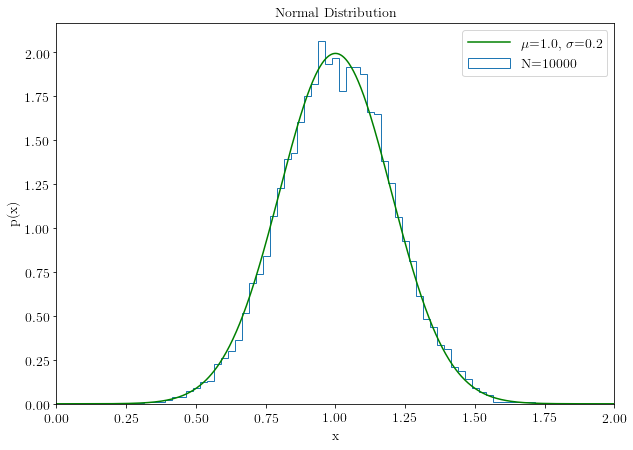

In [3]:
plt.figure(figsize=(10, 7))

# plot normal distribution pdf
x = np.linspace(0,2,1000)
plot = plt.plot(x, dist.pdf(x), ls='-', c="green", label="$\mu$={0}, $\sigma$={1}".format(mu, sigma))
# generate histogram using Freedman-Diaconis bin size
plot = fancyhist(vals, bins="freedman", density=True, histtype="step", label="N={0}".format(N))

plt.xlabel("x")
plt.ylabel("p(x)")
plt.xlim(0, 2)
plt.title("Normal Distribution")
plt.legend()

# print sigmaG and bin size
binsize = 2.7*sigmaG(vals)/(N**(1./3))
print("binsize = {0}".format(binsize))

## Problem 3

In [5]:
mu2 = 2.0
gamma = 0.5

# generate random samples from cauchy distribution
vals_cauchy = cauchy(loc=mu2, scale=gamma).rvs(N)
# concatenate norm samples and cauchy samples
vals2 = np.concatenate((vals, vals_cauchy))
print(vals2.min())
print(vals2.max())

-7590.0035532787815
769.6712781943249


Freedman-Diaconis binsize = 0.07817799839379663
Scott binsize = 7.04923642250145


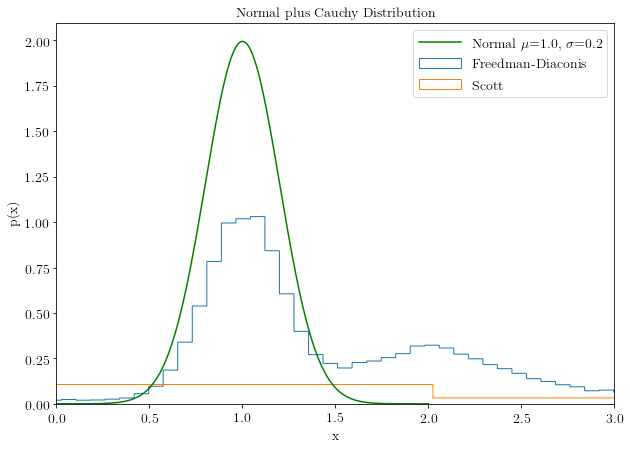

In [6]:
plt.figure(figsize=(10, 7))

# plot normal distribution (same pdf from problem 2)
x = np.linspace(0,2,1000)
plot = plt.plot(x, dist.pdf(x), ls='-', c="green", label="Normal $\mu$={0}, $\sigma$={1}".format(mu, sigma))
# generate histograms of gaussian rvs combined with cauchy rvs
plot = fancyhist(vals2, bins="freedman", density=True, histtype="step", label="Freedman-Diaconis")
plot = fancyhist(vals2, bins="scott", density=True, histtype="step", label="Scott")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.xlim(0, 3)
plt.title("Normal plus Cauchy Distribution")
plt.legend()

# print bin sizes
freedman_binsize = 2.7*sigmaG(vals2)/((2*N)**(1./3))
scott_binsize = 3.5*np.std(vals2)/((2*N)**(1./3))
print("Freedman-Diaconis binsize = {0}".format(freedman_binsize))
print("Scott binsize = {0}".format(scott_binsize))

_ = """
The Freedman-Diaconis binsize is small and produces a reasonable histogram.
The Scott binsize is very large and produces a useless histogram. The problem
seems to be that the cauchy distribution can produce some very extreme
outliers (see the min and max in previous cell). This makes the calculated
standard deviation large, which messes up the Scott binsize calculation. The
Freedman-Diaconis binsize uses the difference between the inner quartiles,
which is not greatly effected by outliers, producing a much more reasonable
binsize.
"""

## Problem 4

In [13]:
from scipy.special import gamma

num_draws = 1000000
gauss = norm(loc=0, scale=1)
Q2 = np.zeros(num_draws, dtype="float")
Q5 = np.zeros(num_draws, dtype="float")

# generate arrays of Q values for 1,000,000 draws of N=2,5 values each
for i in np.arange(0, num_draws):
    Q2[i] = np.power( gauss.rvs(2), 2 ).sum()
    Q5[i] = np.power( gauss.rvs(5), 2 ).sum()
    # print values at (1%, 2%, 3%, ...) progress through loop
    #if (i%(num_draws/100) == 0):
    #    print(int(i/(num_draws/100)), Q2[i], Q5[i])

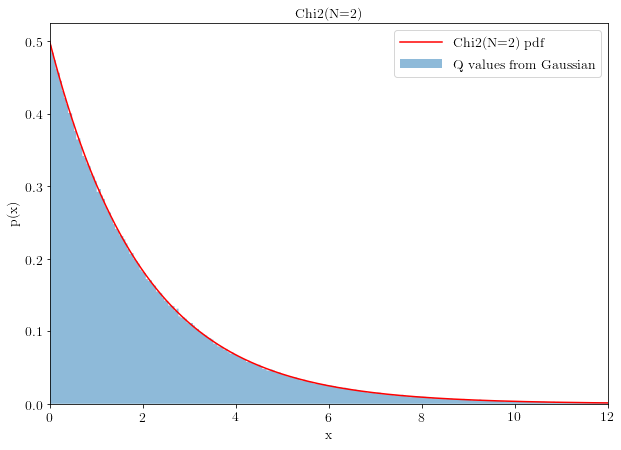

In [20]:
# generate Chi^2 distribution
N = 2
x = np.linspace(0, 12, 1000)
chi2 = (1/(np.power(2, N/2.0) * gamma(N/2.0))) * np.power(x, (N/2.0)-1) * np.exp(-x/2.0)

plt.figure(figsize=(10, 7))
# generate histogram of N=2 Q values
plot = fancyhist(Q2, bins="freedman", density=True, histtype="stepfilled", alpha=0.5, label="Q values from Gaussian")
# generate pdf of Chi^2(N=2) distribution
plot = plt.plot(x, chi2, ls='-', c="red", label="Chi2(N={0}) pdf".format(N))

plt.xlabel("x")
plt.ylabel("p(x)")
plt.xlim(0, 12)
plt.title("Chi2(N={0})".format(N))
plt.legend()

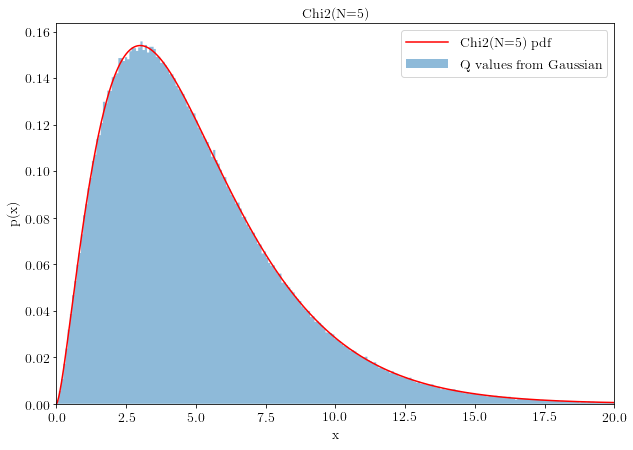

In [22]:
# generate Chi^2 distribution
N = 5
x = np.linspace(0, 20, 1000)
chi2 = (1/(np.power(2, N/2.0) * gamma(N/2.0))) * np.power(x, (N/2.0)-1) * np.exp(-x/2.0)

plt.figure(figsize=(10, 7))
# generate histogram of N=5 Q values
plot = fancyhist(Q5, bins="freedman", density=True, histtype="stepfilled", alpha=0.5, label="Q values from Gaussian")
# generate pdf of Chi^2(N=5) distribution
plot = plt.plot(x, chi2, ls='-', c="red", label="Chi2(N={0}) pdf".format(N))

plt.xlabel("x")
plt.ylabel("p(x)")
plt.xlim(0, 20)
plt.title("Chi2(N={0})".format(N))
plt.legend()